In [3]:
from sympy import *
from sympy.physics.quantum import TensorProduct,Dagger
from sympy import sqrt
from sympy.physics.quantum.qubit import Qubit,matrix_to_qubit,represent,matrix_to_density
from sympy.physics.quantum.gate import HadamardGate
from sympy.physics.quantum.qapply import qapply
from sympy.physics.quantum.gate import CNOT
from sympy.physics.quantum.gate import X,Y,Z
from sympy.physics.matrices import msigma

## Quantum mechanical objects are non-commutative, one may define non-commutative symbols to perform calculations by

In [4]:
sx,sy,sz=symbols('\\sigma_{x} \\sigma_{y} \\sigma_{z}',commutative=False)

In [5]:
sx*sy-sy*sx

\sigma_{x}*\sigma_{y} - \sigma_{y}*\sigma_{x}

Often when we want to perform calculations for some given operators we know the commutation relations, for example  for the pauli matrices we have:

$[\sigma_{i},\sigma_{j}]=2 i \epsilon_{ijk}$ 

where $\epsilon_{ijk}$ is the Levi-Civita symbol, we may implement those relations by simple substitution since:

$\sigma_{i} \sigma_{j}= 2 i \epsilon_{ijk}+ \sigma_{j} \sigma_{i}$

Let us implement this for $\sigma_{x},\sigma_{y}$

**PD**: $x=1,y=2,z=3$

In [6]:
(sx*sy-sy*sx).subs({sx*sy:2*I*sz+sy*sx}) # Using subs we simply rewrite sx*sy in terms of sy*sx

2*I*\sigma_{z}

**Task**: Make a function that implements all of the commutation relations for pauli matrices, and also uses the fact that $\sigma_{x}^{2}=\sigma_{y}^{2}=\sigma_{z}^{2}=1$, test it by calculating $[\sigma_{+},[\sigma_{-},\sigma_{z}]]$

In [7]:
def comm(A,B):
    """Given two operators A and B returns the commutator AB-BA"""
    return A*B-B*A

In [10]:
sp,sm=symbols('\\sigma_{+} \\sigma_{-}',commutative=False)

In [146]:
def function1():
    z=Matrix([[0, 1], [1, 0]])
    x=Matrix([[0, 1], [1, 0]])
    y=Matrix([[0, -I], [I, 0]])
    com1 = comm(x,y)
    com2 = comm(y,z)
    com3 = comm(x,z)
    sp = (x + I*y)
    sm = (x - I*y)
    com4 = comm(sm,z)
    com5 = comm(sp,com4)
    return com5

In [147]:
function1()

Matrix([
[0, 8],
[0, 0]])

In [148]:
def function2():
    com1 = comm(sx,sy).subs({sx*sy:2*I*sz+sy*sx})
    com2 = comm(sy,sz).subs({sy*sz:2*I*sx+sz*sy})
    com3 = comm(sx,sz).subs({sx*sz:2*I*sy+sz*sx})
    sp = (sx+I*sy)/2
    sm = (sx-I*sy)/2
    com4 = comm(sm,sz)
    com5 = comm(sp,com4)
    solution = expand(com5).subs({sx*sy:I*sz, sx*sz:-I*sy, sy*sz:I*sx, sy*sx:-I*sz, sz*sx:-I*sy, sz*sy:-I*sx})
    solution2 = solution.subs({sx*sy:I*sz, sy**2:1, sz**2:1})
    return solution2

In [149]:
function2()

3*\sigma_{z}/2

## Pauli Algebra already comes in sympy, let us see how the task above can be done using the sympy implementation

In [37]:
from sympy.physics.paulialgebra import Pauli, evaluate_pauli_product

In [38]:
smas=(Pauli(1)+I*Pauli(2))/2
smenos=(Pauli(1)-I*Pauli(2))/2

In [39]:
def comm(A,B):
    """Given two operators A and B returns the commutator AB-BA"""
    return A*B-B*A

In [40]:
evaluate_pauli_product(comm(smas,comm(smenos,Pauli(3))).expand())

2*sigma3

Doing non-commutative algebra in the computer is specially useful when you deal with bosonic opeators, which satisfy 

$[a,a^{\dagger}]=1$

One side remark is that in order for this to be effective one needs to consider that operators from different Hilbert spaces commute if one has:

$a b^{\dagger} a^{\dagger} b- a^{\dagger}  b  a b^{\dagger}$

Where both a, and b are bosonic operators, but from different hilber spaces,This is equal to:
$a a^{\dagger}\otimes b^{\dagger} b- a^{\dagger} a\otimes b b^{\dagger}$

One may implement such ordering by replacing

$b a^{\dagger}=a^{\dagger} b$

and all similar products with a fixed ordering for example alphabetical, let us consider the above example

In [69]:
a,b,rho=symbols('a b rho',commutative=False)
ad=Dagger(a)
bd=Dagger(b)

In [42]:
ordered=(a*bd*ad*b-ad*b*a*bd).subs({bd*ad:ad*bd,b*a:a*b}) # we order it so that it is clearly a product of hilbert spaces
ordered

a*Dagger(a)*Dagger(b)*b - Dagger(a)*a*b*Dagger(b)

In [43]:
ordered.subs({ad*a:a*ad-1,bd*b:b*bd-1}).expand()

-a*Dagger(a) + b*Dagger(b)

**Task**: Define a function that implements all of the above to calculate

$\mathcal{L}[\rho]= a \rho a^{\dagger}- \frac{a^{\dagger}a \rho+\rho a^{\dagger}a}{2}$

Test it on $\rho=a^{\dagger}a$

In [70]:
ordered=(a*rho*ad-(ad*a*rho+rho*ad*a)/2)
ordered

a*rho*Dagger(a) - (rho*Dagger(a)*a + Dagger(a)*a*rho)/2

In [71]:
rho=ad*a
ordered=(a*rho*ad-(ad*a*rho+rho*ad*a)/2).subs({ad*a*ad*a:a*ad*a*ad})
ordered

0

In [81]:
import sympy
com = sympy.physics.quantum.Commutator(a, ad)
com.doit()

a*Dagger(a) - Dagger(a)*a

# Review Excercises:

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

1. One of the three qubits maximally entangled states is the GHZ state which is defined by:

\begin{equation}
\ket{\psi}= \frac{1}{\sqrt{2}} \left( \ket{0} \otimes \ket{0} \otimes \ket{0} + \ket{1} \otimes \ket{1} \otimes \ket{1} \right) = \frac{1}{\sqrt{2}} \left ( \ket{000} +\ket{111} \right)
\end{equation}

First show that the GHZ state is an eigenvector of $\sigma_{y}\otimes \sigma_{y}\otimes\sigma_{x}$, what is the eigenvalue?

Now add a relative phase such that 

\begin{equation}
\ket{\psi'} = \frac{1}{\sqrt{2}} \left ( \ket{000} +e^{i \phi}\ket{111} \right)
\end{equation}

Is $\ket{\psi'}$ an eigenvector?

### **Solution**:

To solve this problem we are going to use the [Quantum mechanics library](https://docs.sympy.org/latest/modules/physics/quantum/index.html) for bracket notation, let us review how it worked

To define a ket we simply use the Qubit command, which defines a ket in the computational basis:

for example if we want $\ket{00}=\ket{0} \otimes \ket{0}$ we would simply do Qubit('00'), using this knowledge we move on to define the GHZ state

In [95]:
ghz=(1/sqrt(2))*(Qubit('000')+Qubit('111'))  # Definition of GHZ state
ghz

sqrt(2)*(|000> + |111>)/2

remember we can go from qubit to matrix representation simply by using the represent command

In [14]:
represent(ghz)

Matrix([
[sqrt(2)/2],
[        0],
[        0],
[        0],
[        0],
[        0],
[        0],
[sqrt(2)/2]])

We may also go back simply by using the matrix_to_qubit command:

In [15]:
matrix_to_qubit(represent(ghz))

sqrt(2)*|000>/2 + sqrt(2)*|111>/2

 Now We need to apply the X, Y,Z gates on the qubit, they have been imported as X,Y and Z respectively since they are included in the quantum mechanics library, to apply them on a given qubit we simply indicate on which one we want to apply it on and them mulplity the state
 
 $X(0)\ket{state}$
 
Would apply the x gate on qubit 1, while
 
  $Z(2)\ket{state}$
  
Would apply the Z gate on qubit 3

By convention the qubits are counted from right to left

[Insert image]

In [16]:
state=X(2)*Y(1)*Y(0)*ghz #Apply required operations on GHZ
state

sqrt(2)*X(2)*Y(1)*Y(0)*(|000> + |111>)/2

To do the operations explicitly we need to call the qapply function

In [17]:
state=qapply(state)
state

-sqrt(2)*|000>/2 - sqrt(2)*|111>/2

We can clearly see that GHZ is an eigenstate with eigenvalue -1

In [18]:
(state+ghz).expand() #verifification of statement above

0

#### **Task**: Complete the rest of the exercise by repeating the steps

In [19]:
phi=symbols('phi')

In [87]:
e=exp(I*phi) # Definition of the phase as a hint 
e

exp(I*phi)

In [88]:
ghz2=(1/sqrt(2))*(Qubit('000')+e*Qubit('111')) 
ghz2

sqrt(2)*(exp(I*phi)*|111> + |000>)/2

In [89]:
represent(ghz2)

Matrix([
[           sqrt(2)/2],
[                   0],
[                   0],
[                   0],
[                   0],
[                   0],
[                   0],
[sqrt(2)*exp(I*phi)/2]])

In [90]:
matrix_to_qubit(represent(ghz2))

sqrt(2)*exp(I*phi)*|111>/2 + sqrt(2)*|000>/2

In [91]:
state2=X(2)*Y(1)*Y(0)*ghz2
state2

sqrt(2)*X(2)*Y(1)*Y(0)*(exp(I*phi)*|111> + |000>)/2

In [92]:
state2=qapply(state2)
state2

-sqrt(2)*|111>/2 + sqrt(2)*X(2)*Y(1)*Y(0)*exp(I*phi)*|111>/2

In [93]:
(state2+ghz2).expand()

sqrt(2)*exp(I*phi)*|111>/2 + sqrt(2)*|000>/2 - sqrt(2)*|111>/2 + sqrt(2)*X(2)*Y(1)*Y(0)*exp(I*phi)*|111>/2

Using $\ket{\psi}$ Calculate the following expectation values:

\begin{align*}
\bra{\psi} (\sigma_{y} \otimes \sigma_{y} \otimes \sigma_{y})\ket{\psi}, \hspace{0.5cm} \bra{\psi} (\sigma_{x} \otimes \sigma_{x} \otimes \sigma_{y})\ket{\psi} \\
\bra{\psi} (\sigma_{x} \otimes \sigma_{y} \otimes \sigma_{x})\ket{\psi}, \hspace{0.5cm} \bra{\psi} (\sigma_{y} \otimes \sigma_{x} \otimes \sigma_{x})\ket{\psi}
\end{align*}

What do they have in common? Now calculate:

\begin{align*}
\bra{\psi} (\sigma_{x} \otimes \sigma_{y} \otimes \sigma_{y})\ket{\psi}, \hspace{0.5cm} \bra{\psi} (\sigma_{y} \otimes \sigma_{x} \otimes \sigma_{y})\ket{\psi} \\
\bra{\psi} (\sigma_{y} \otimes \sigma_{y} \otimes \sigma_{x})\ket{\psi}, \hspace{0.5cm} \bra{\psi} (\sigma_{x} \otimes \sigma_{x} \otimes \sigma_{x})\ket{\psi}
\end{align*}

Are they different from the previous group?

### Beginning of the solution:

We already reviewed how to compute thinks like $\sigma_{y}\otimes \sigma_{y} \otimes \sigma_{y} \ket{\psi}$ so let us start by doing that

In [96]:
state=Y(0)*Y(1)*Y(2)*ghz
state

sqrt(2)*Y(0)*Y(1)*Y(2)*(|000> + |111>)/2

Then let us remember that to obtain, the bra from a ket we simply need to perform the dagger operation $\ket{\psi}^{\dagger}=\bra{\psi}$, which in this framework is implemented by the Dagger function

In [97]:
Dagger(ghz)

sqrt(2)*(<000| + <111|)/2

We may then simply multiply the dagger so that we obtain $\bra{\psi}\sigma_{y}\otimes \sigma_{y} \otimes \sigma_{y} \ket{\psi}$

In [98]:
(Dagger(ghz)*state).expand() # we used expand so it displays better

<000|*Y(0)*Y(1)*Y(2)*|000>/2 + <000|*Y(0)*Y(1)*Y(2)*|111>/2 + <111|*Y(0)*Y(1)*Y(2)*|000>/2 + <111|*Y(0)*Y(1)*Y(2)*|111>/2

Again we use qapply to get the explicit calculation, and do it so that it computes inner products (which sometimes qapply does not execute)

In [99]:
qapply((Dagger(ghz)*state).expand()).doit()

0

### We may do the same by matrix multiplication let us remind ourselves how it works using matrix multiplication in sympy which we covered the first 2 weeks (for those of you more experience it will be done on numpy as well), we first define $\sigma_y$ as a matrix

In [100]:
sy=Matrix([[0,-I],[I,0]])
sy

Matrix([
[0, -I],
[I,  0]])

Then we may remember that we can obtain $\sigma_{y} \otimes \sigma_{y}$ by the kronecker product, so we use that to find
$\sigma_{y} \otimes \sigma_{y}\otimes \sigma_{y}$

In [101]:
sy2=kronecker_product(sy,sy)
sy2

Matrix([
[ 0, 0, 0, -1],
[ 0, 0, 1,  0],
[ 0, 1, 0,  0],
[-1, 0, 0,  0]])

In [102]:
sy3=kronecker_product(sy,sy2)
sy3

Matrix([
[ 0, 0, 0,  0, 0,  0,  0, I],
[ 0, 0, 0,  0, 0,  0, -I, 0],
[ 0, 0, 0,  0, 0, -I,  0, 0],
[ 0, 0, 0,  0, I,  0,  0, 0],
[ 0, 0, 0, -I, 0,  0,  0, 0],
[ 0, 0, I,  0, 0,  0,  0, 0],
[ 0, I, 0,  0, 0,  0,  0, 0],
[-I, 0, 0,  0, 0,  0,  0, 0]])

Now we neet to construct the GHZ state. We may obtain it from the kronecker product as well remembering that:

\begin{equation}
\ket{\psi}= \frac{1}{\sqrt{2}} \left( \ket{0} \otimes \ket{0} \otimes \ket{0} + \ket{1} \otimes \ket{1} \otimes \ket{1} \right) = \frac{1}{\sqrt{2}} \left ( \ket{000} +\ket{111} \right)
\end{equation}

let us first define the computational basis ($\ket{0},\ket{1}$)

In [103]:
zero=Matrix([1,0])
zero

Matrix([
[1],
[0]])

In [104]:
one=Matrix([0,1])
one

Matrix([
[0],
[1]])

Now we get $\ket{0}\otimes\ket{0}\otimes\ket{0}=\ket{000} $ in the same way we got the tensor product for $\sigma_{y}s$

In [105]:
zero2=kronecker_product(zero,zero)
zero2

Matrix([
[1],
[0],
[0],
[0]])

In [106]:
zero3=kronecker_product(zero,zero2)
zero3

Matrix([
[1],
[0],
[0],
[0],
[0],
[0],
[0],
[0]])

In [107]:
one2=kronecker_product(one,one)
one2

Matrix([
[0],
[0],
[0],
[1]])

In [108]:
one3=kronecker_product(one,one2)
one3

Matrix([
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[1]])

then the GHZ state is given by:

In [109]:
ghz_matrix=(one3+zero3)/sqrt(2)
ghz_matrix

Matrix([
[sqrt(2)/2],
[        0],
[        0],
[        0],
[        0],
[        0],
[        0],
[sqrt(2)/2]])

In [110]:
represent(ghz)==ghz_matrix ## Checking it's the same as our implementation in bra-ket

True

In [111]:
sy3*ghz_matrix ## We simply apply the sigma_ys on ghz

Matrix([
[ sqrt(2)*I/2],
[           0],
[           0],
[           0],
[           0],
[           0],
[           0],
[-sqrt(2)*I/2]])

We now simply compute the inner product by matrix multiplication (row vector times column vector), we obtain the row vector by Dagger once again

In [112]:
Dagger(ghz_matrix)*sy3*ghz_matrix

Matrix([[0]])

####  **Task**: 

Finish this by excersise by following the same steps,  The results agree, which method to use to complete the exercise is up to you however for dimensionality an ease of reading we recomend you use bracket notation (which is way easier on handwritten calculations)

In [128]:
qapply(X(0)*X(1)*Y(2)*ghz)

-sqrt(2)*I*|000>/2 + sqrt(2)*I*|111>/2

In [129]:
qapply((Dagger(ghz)*X(0)*X(1)*Y(2)*ghz).expand()).doit()

0

In [130]:
qapply(X(0)*Y(1)*X(2)*ghz)

-sqrt(2)*I*|000>/2 + sqrt(2)*I*|111>/2

In [131]:
qapply((Dagger(ghz)*X(0)*Y(1)*X(2)*ghz).expand()).doit()

0

In [132]:
qapply(Y(0)*X(1)*X(2)*ghz)

-sqrt(2)*I*|000>/2 + sqrt(2)*I*|111>/2

In [133]:
qapply((Dagger(ghz)*Y(0)*X(1)*X(2)*ghz).expand()).doit()

0

In [134]:
qapply(X(0)*Y(1)*Y(2)*ghz)

-sqrt(2)*|000>/2 - sqrt(2)*|111>/2

In [135]:
qapply((Dagger(ghz)*X(0)*Y(1)*Y(2)*ghz).expand()).doit()

-1

In [138]:
qapply(Y(0)*X(1)*Y(2)*ghz)

-sqrt(2)*|000>/2 - sqrt(2)*|111>/2

In [139]:
qapply((Dagger(ghz)*Y(0)*X(1)*Y(2)*ghz).expand()).doit()

-1

In [140]:
qapply(Y(0)*Y(1)*X(2)*ghz)

-sqrt(2)*|000>/2 - sqrt(2)*|111>/2

In [142]:
qapply((Dagger(ghz)*Y(0)*Y(1)*X(2)*ghz).expand()).doit()

-1

In [143]:
qapply(X(0)*X(1)*X(2)*ghz)

sqrt(2)*|000>/2 + sqrt(2)*|111>/2

In [144]:
qapply((Dagger(ghz)*X(0)*X(1)*X(2)*ghz).expand()).doit()

1

**Task**: Think about $\ket{00000...000}$ and  $\ket{111...111}$ meaning n qubit states of all zeros and ones, can you always tell what is vector representation is? what is it?

Based on the exampels: 

$\ket{1}$ is:

In [152]:
one

Matrix([
[0],
[1]])

$\ket{11}$ is:

In [150]:
one2 

Matrix([
[0],
[0],
[0],
[1]])

$\ket{111}$ is:

In [153]:
one3

Matrix([
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[1]])

One can realised that in every case all values of a vector except last one are equal to 0 and last one value is equel to 1. One can assume that for every vector of 2$^n$ elements which respresent $\ket{111...111}$ for first 2$^n-$1 elements value will be and for the last one element value will be 1.

$\ket{0}$ is:

In [155]:
zero

Matrix([
[1],
[0]])

$\ket{00}$ is:

In [156]:
zero2

Matrix([
[1],
[0],
[0],
[0]])

$\ket{000}$ is:

In [158]:
zero3

Matrix([
[1],
[0],
[0],
[0],
[0],
[0],
[0],
[0]])

On that same way one can realised that in every case all values of a vector except first one are equal to 0 and first one value is equel to 1. One can assume that in every case as $\ket{00000...000}$ for firs element value will be 1 and for the last 2$^2-1$ elements value will be 0.

 Those of you more experienced, would ask why not use numpy? well the answer is we generally want to perform symbolic computations meaning keeping parameters as symbols not numbers, but in this case there were no parameters, so yes, numpy would be a better option, the usage is pretty similar and sympy objects are usually transformed to numpy when you want numerics, so we'll just repeat the process here
 
 **PD:** you may want to master numpy, many resources are available you may try [these exercises](https://www.codewars.com/collections/numpy-1) 

In [160]:
import numpy as np # importing the numpy library

Numpy matrices are defined through arrays as a list of list in the same way sympy matrices are defined:

In [161]:
sy_np=np.array([[0,-1j],[1j,0]]) # We use 1j instead of I because I is a sympy simbol, while 1j is the imaginary unit in standard python

Alternatively we may conver a sympy matrix to numpy by 

np.array(A.tolist()).astype(np.complex128)

where A is our sympy matrix

In [162]:
np.array(sy.tolist()).astype(np.complex128)

array([[0.+0.j, 0.-1.j],
       [0.+1.j, 0.+0.j]])

In [163]:
zero_np=np.array(zero.tolist()).astype(np.complex128)
one_np=np.array(one.tolist()).astype(np.complex128)
ghz_np=np.array(ghz_matrix.tolist()).astype(np.complex128)

In numpy the kronecker product is defined as kron, so to do it we simply use np.kron

In [164]:
sy3_np=np.kron(np.kron(sy_np,sy_np),sy_np)

One may finally do the matrix multiplication, remember that Dagger means conjugate transpose, in numpy it can be implemented by the methods conj() and T

In [165]:
ghz_np.conj().T*sy3_np*ghz_np

array([[ 0.+0.j ,  0.+0.j ,  0.+0.j ,  0.+0.j ,  0.+0.j ,  0.+0.j ,
         0.+0.j ,  0.+0.5j],
       [ 0.+0.j ,  0.+0.j ,  0.+0.j ,  0.+0.j ,  0.+0.j ,  0.+0.j ,
        -0.+0.j ,  0.+0.j ],
       [ 0.+0.j ,  0.+0.j ,  0.+0.j ,  0.+0.j ,  0.+0.j , -0.+0.j ,
         0.+0.j ,  0.+0.j ],
       [ 0.+0.j ,  0.+0.j ,  0.+0.j ,  0.+0.j ,  0.+0.j ,  0.+0.j ,
         0.+0.j ,  0.+0.j ],
       [ 0.+0.j ,  0.+0.j ,  0.+0.j , -0.+0.j ,  0.+0.j ,  0.+0.j ,
         0.+0.j ,  0.+0.j ],
       [ 0.+0.j ,  0.+0.j ,  0.+0.j ,  0.+0.j ,  0.+0.j ,  0.+0.j ,
         0.+0.j ,  0.+0.j ],
       [ 0.+0.j ,  0.+0.j ,  0.+0.j ,  0.+0.j ,  0.+0.j ,  0.+0.j ,
         0.+0.j ,  0.+0.j ],
       [ 0.-0.5j,  0.+0.j ,  0.+0.j ,  0.+0.j ,  0.+0.j ,  0.+0.j ,
         0.+0.j ,  0.+0.j ]])

Well this is clearly not zero, what went wrong? well it's because in numpy * is element wise multiplication (can do [broadcasting as well](https://numpy.org/doc/stable/user/basics.broadcasting.html) ), to do matrix multiplication The @ operator is used

In [166]:
ghz_np.conj().T@sy3_np@ghz_np

array([[0.+0.j]])

We again get the same result, both results in no time, but I previously said numpy is faster so let us benchmark this using the %timeit magic

In [167]:
%timeit ghz_np.conj().T@sy3_np@ghz_np #numpy time

2.87 µs ± 25.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [168]:
%timeit Dagger(ghz)*(sy3)*ghz #sympy time

83.7 µs ± 432 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [169]:
%timeit qapply((Dagger(ghz)*Y(0)*Y(1)*Y(2)*ghz).expand()).doit()

3.01 ms ± 13.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


if we increase the number of qubits to let's say 12 then

In [170]:
n=12

In [171]:
ghz_20=(Qubit('0'*n)+Qubit('1'*n))/sqrt(2)

In [172]:
%timeit qapply(Dagger(ghz_20)*prod([Y(i) for i in range(0,n)])*ghz_20)

19.3 ms ± 242 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [173]:
zero_20=np.array([1]+[0]*(2**n -1))
one_20=np.array([0]*(2**n -1)+[1])

In [175]:
new=sy_np
for i in range(n-1):
    new=np.kron(sy_np,new)

In [176]:
ghz_20_np=(zero_20 +one_20)/np.sqrt(2)

In [177]:
%timeit ghz_20_np.conj().T@new@ghz_20_np.T

10.7 ms ± 657 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [178]:
%%timeit
new=sy_np
for i in range(n-1):
    new=np.kron(sy_np,new)
ghz_20_np.conj().T@new@ghz_20_np.T

182 ms ± 4.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


and of course as the matrix dimension goes up this time difference becomes more and more important

# 2.- Density matrices

In quantum mechanics the symbol $\rho$ usually refers to the density matrix, which has the following properties:

- $Tr(\rho)=1$
- $Tr(\rho^{2})\leq 1$
- $Eigvals > 0$
- Pure if eigvals are (n-1) 0s, and 1 one

Using this knowlegde and your computer linear algebra skill, solve the next excercise

Consider the density matrix for a bell state

\begin{equation}
\rho= r \ket{\Phi^{+}}\bra{\Phi^{+}} + (1-r) \ket{00} \bra{00}
\end{equation}

Where $\ket{\Phi^{+}}$ is the bell state: 

\begin{equation}
\ket{\Phi^{+}}= \frac{1}{\sqrt{2}} \left( \ket{00}+ \ket{11} \right) 
\end{equation}

\begin{itemize}
\item Is $\rho$ a valid density matrix? under which constraints?

\item If so is it a pure or mixed state?



In [179]:
bell=(Qubit('00')+Qubit('11'))/sqrt(2)
bell

sqrt(2)*(|00> + |11>)/2

In [180]:
r=symbols('r',real=True)
r

r

In [181]:
rho=r*bell*Dagger(bell) +(1-r)*Qubit('00')*Dagger(Qubit('00'))
rho

r*(|00> + |11>)*(<00| + <11|)/2 + (1 - r)*|00>*<00|

In [182]:
R=represent(rho.expand())
R

Matrix([
[1 - r/2, 0, 0, r/2],
[      0, 0, 0,   0],
[      0, 0, 0,   0],
[    r/2, 0, 0, r/2]])

In [183]:
R.trace()

1

In [184]:
R.eigenvals()

{1/2 - sqrt(2*r**2 - 2*r + 1)/2: 1, sqrt(2*r**2 - 2*r + 1)/2 + 1/2: 1, 0: 2}

not quite readable so we rearrange it

In [185]:
T=list(R.eigenvals().keys())
T[0]

1/2 - sqrt(2*r**2 - 2*r + 1)/2

In [186]:
T[1]

sqrt(2*r**2 - 2*r + 1)/2 + 1/2

In [187]:
import matplotlib.pyplot as plt

In [188]:
eig1=lambdify(r,T[1])
eig2=lambdify(r,T[0])
rr=np.linspace(0,2,100)

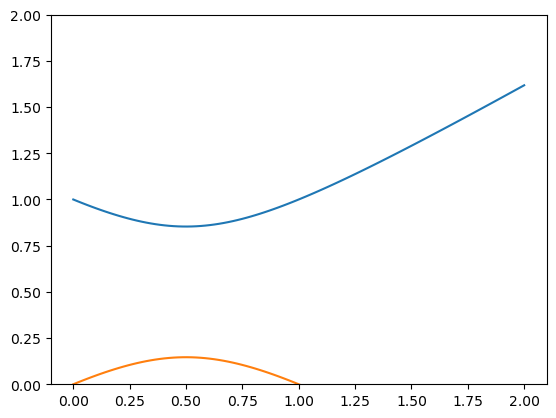

In [189]:
plt.plot(rr,eig1(rr))
plt.plot(rr,eig2(rr))
plt.ylim(0,2)
plt.show()

In [190]:
Var5=(R*R).expand()
Var5.trace()

r**2 - r + 1

In [191]:
purity=lambdify(r,Var5.trace())

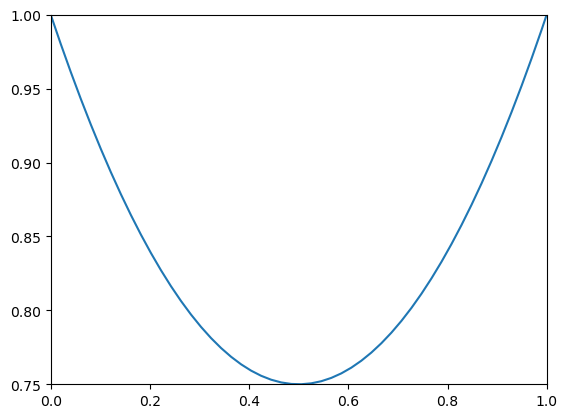

In [192]:
plt.plot(rr,purity(rr))
plt.xlim(0,1)
plt.ylim(0.75,1)
plt.show()

In [193]:
U=Matrix([[1/2,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,1/2]])

In [194]:
X=((R-U)**2).expand()

In [195]:
distance=lambdify(r,(X**(1/2)).trace().simplify().factor())

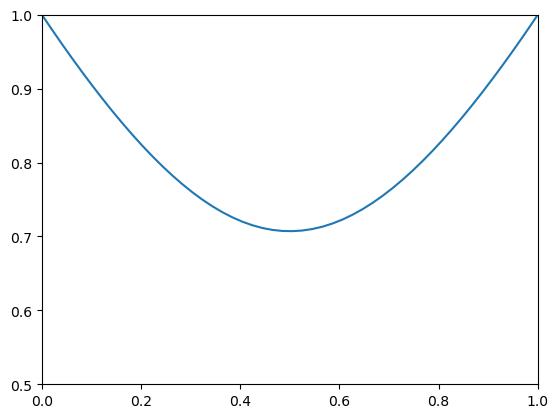

In [196]:
plt.plot(rr,distance(rr))
plt.xlim(0,1)
plt.ylim(0.5,1)
plt.show()